In [1]:
#libraries
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# model - simple tank with heater
def temp(te,t,tin,q,m,cp):
    dTdt = tin - te + q/(m*cp)
    return dTdt

In [3]:
# model parameters
t = np.linspace(0,200,1000)
q = 100.0
m = 10.0
cp = 4.1
tin = 293.15
te0 = 293.15
te = np.ones(len(t))
te[0] = te0

In [11]:
# controller parameters
error = np.zeros(len(t))
qcontrol = np.ones(len(t))*100
sp = np.ones(len(t))*350
sp[600:] = 340

In [12]:
# tuning parameters for PID
kc = 1.2
taui = 5.0
taud = 5.0

Isum = 0
LastError = 0
Dsum = 0

In [13]:
#integrator
for i in range(len(t)-1):
    ## controller
    error[i] = sp[i] - te0
    Isum = Isum + (kc/taui)*error[i]
    Dsum = (kc/taud)*(error[i]-LastError)
    qcontrol[i] = qcontrol[0] + kc*error[i] + Isum + Dsum
    ##################################################
    tep = odeint(temp,te0,[t[i],t[i+1]],args=(tin,qcontrol[i],m,cp,))
    te0 = tep[1]
    te[i+1] = tep[1]
    LastError = error[i]
#print(te)

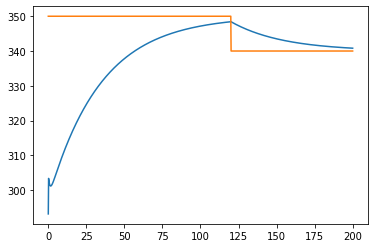

In [14]:
# plot them
plt.plot(t,te)
plt.plot(t,sp)
#plt.plot(t,qcontrol)
plt.show()